In [176]:
library(TSCAN)
library(dplyr)
library(ggplot2)

In [184]:
# utility function for setting plot dimensions
set_plot_dimensions = function(width_choice, height_choice) {
    options(repr.plot.width=width_choice, repr.plot.height=height_choice)}

In [185]:
options(warn=-1)

## Testing on toy data set provided by TSCAN

In [10]:
data(lpsdata)
# preprocess: zero-trimming, taking log, gene-clustering
procdata = preprocess(lpsdata)

In [11]:
# cell-clustering based on mclust
lpsmclust = exprmclust(procdata)

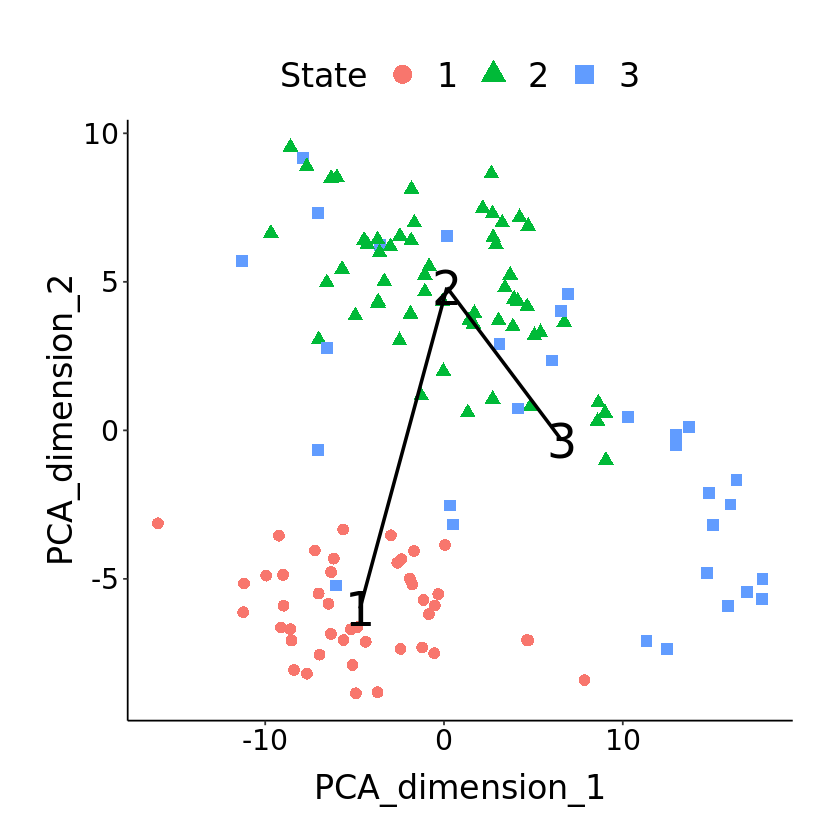

In [43]:
plotmclust(lpsmclust)

In [44]:
# cluster ordering on the minimal spanning tree
lpsorder = TSCANorder(lpsmclust)

In [45]:
# Use difftest function to detect differentially expressed genes given a constructed pseudotemporal ordering.
diffval = difftest(procdata,lpsorder)

In [46]:
# print out a few genes that are significantly changed acrossed the tree nodes (each of which is the mean of 
# cells in the same cluster)
head(row.names(diffval)[diffval$qval < 0.05])

[1] "STX6"     "MRPL28"   "CUTA"     "AI413582" "SNRPC"    "MTCH1"

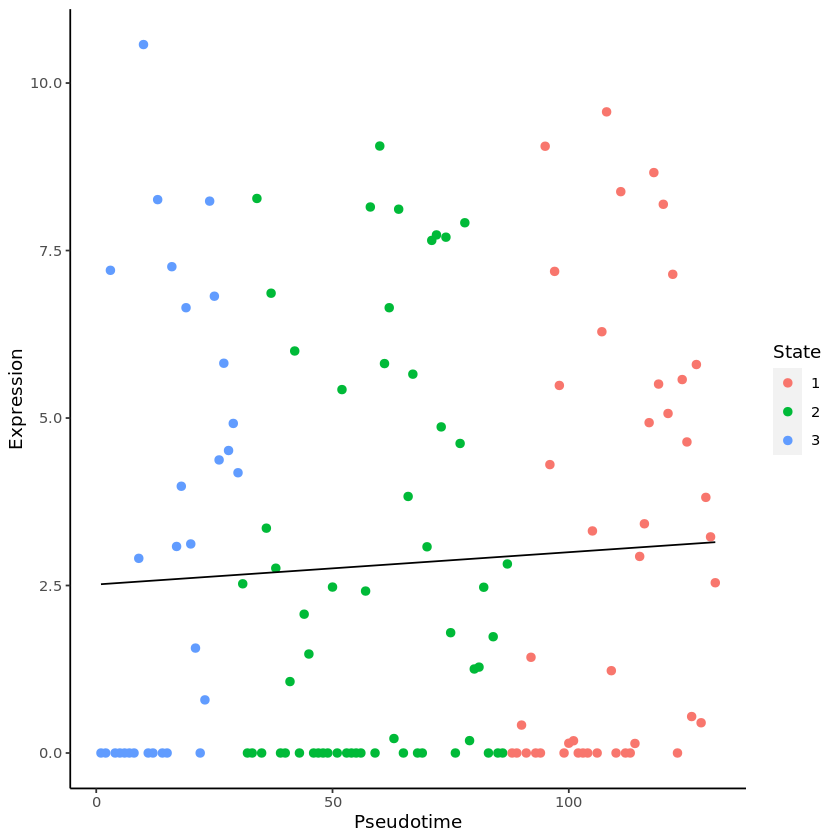

In [47]:
# plot pseudotemporal trajectory of certain gene expression
STAT2expr = log2(lpsdata["STX6",]+1)
singlegeneplot(STAT2expr, TSCANorder(lpsmclust,flip=TRUE,orderonly=FALSE))

In [63]:
class(lpsdata)

[1] "matrix"

## Testing on sample 310

The reason for choosing 310 is that it contains about 800 cells which is neither too few nor too many

In [89]:
count310 = read.csv(file='/scratch/count_matrix_sample310.csv',header=TRUE)

In [90]:
rownames(count310) = count310$X

In [76]:
count310 = count310[-c(1)]

In [77]:
count310 = data.matrix(count310)

In [81]:
preprocessed_count310 = preprocess(count310)

In [82]:
sample310_cluster = exprmclust(preprocessed_count310, clusternum = 2:150)

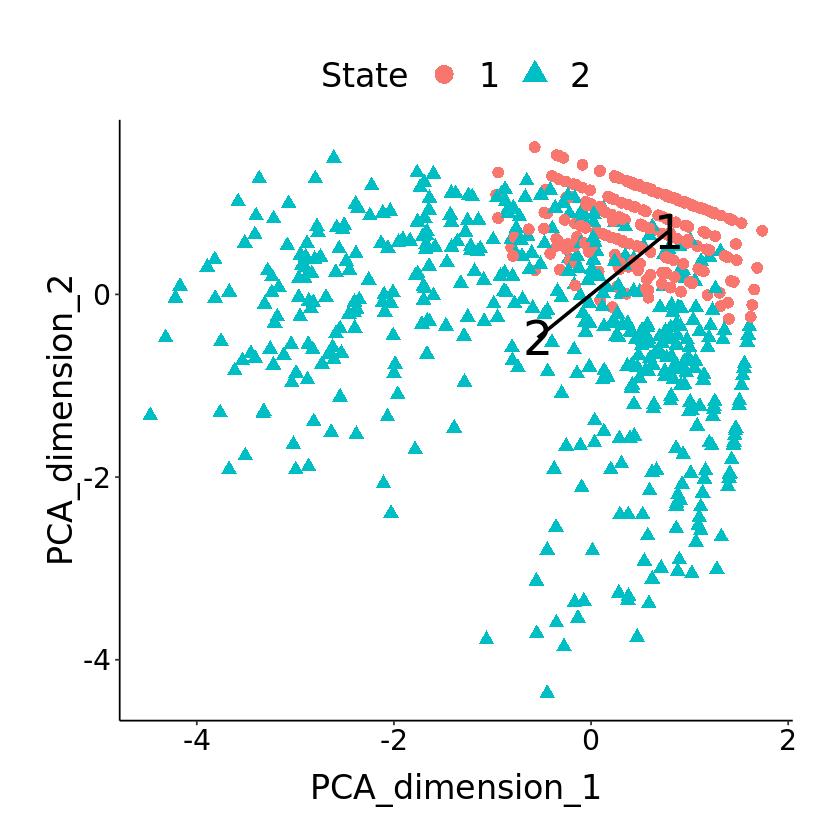

In [83]:
plotmclust(sample310_cluster)

In [84]:
sample310_order = TSCANorder(sample310_cluster)

In [85]:
sample310_diffval = difftest(preprocessed_count310,sample310_order)

In [86]:
head(row.names(sample310_diffval)[sample310_diffval$qval < 0.05])

[1] "LAPTM5" "SOD2"   "MT2A"   "CCL4"

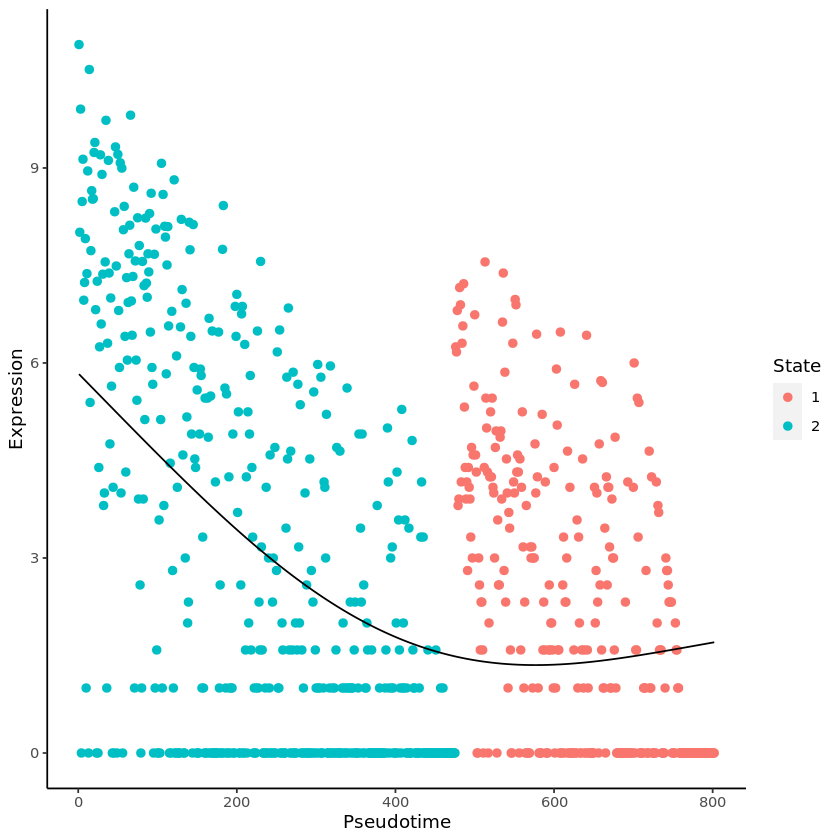

In [88]:
# plot pseudotemporal trajectory of certain gene expression
CCL4expr = log2(count310['CCL4',]+1)
singlegeneplot(CCL4expr, TSCANorder(sample310_cluster,flip=TRUE,orderonly=FALSE))

## Testing on Using Imported PCA Representation

In [168]:
PCA_matrix = read.csv(file = '/scratch/PCA_mapped_cell_coordinates.csv')

In [169]:
rownames(PCA_matrix) = PCA_matrix[,'X']
PCA_matrix = PCA_matrix[,2:ncol(PCA_matrix)]

In [170]:
clusterid = as.numeric(as.factor(PCA_matrix['cluster',]))
PCA_matrix = PCA_matrix[1:nrow(PCA_matrix)-1,]

In [171]:
names(clusterid) = colnames(PCA_matrix)

In [172]:
# the reduce=F argument is crucial, without it the function performs SVD again
tscan_cluster = exprmclust(PCA_matrix,cluster=clusterid,reduce=F)

In [182]:
set_plot_dimensions(20,20)

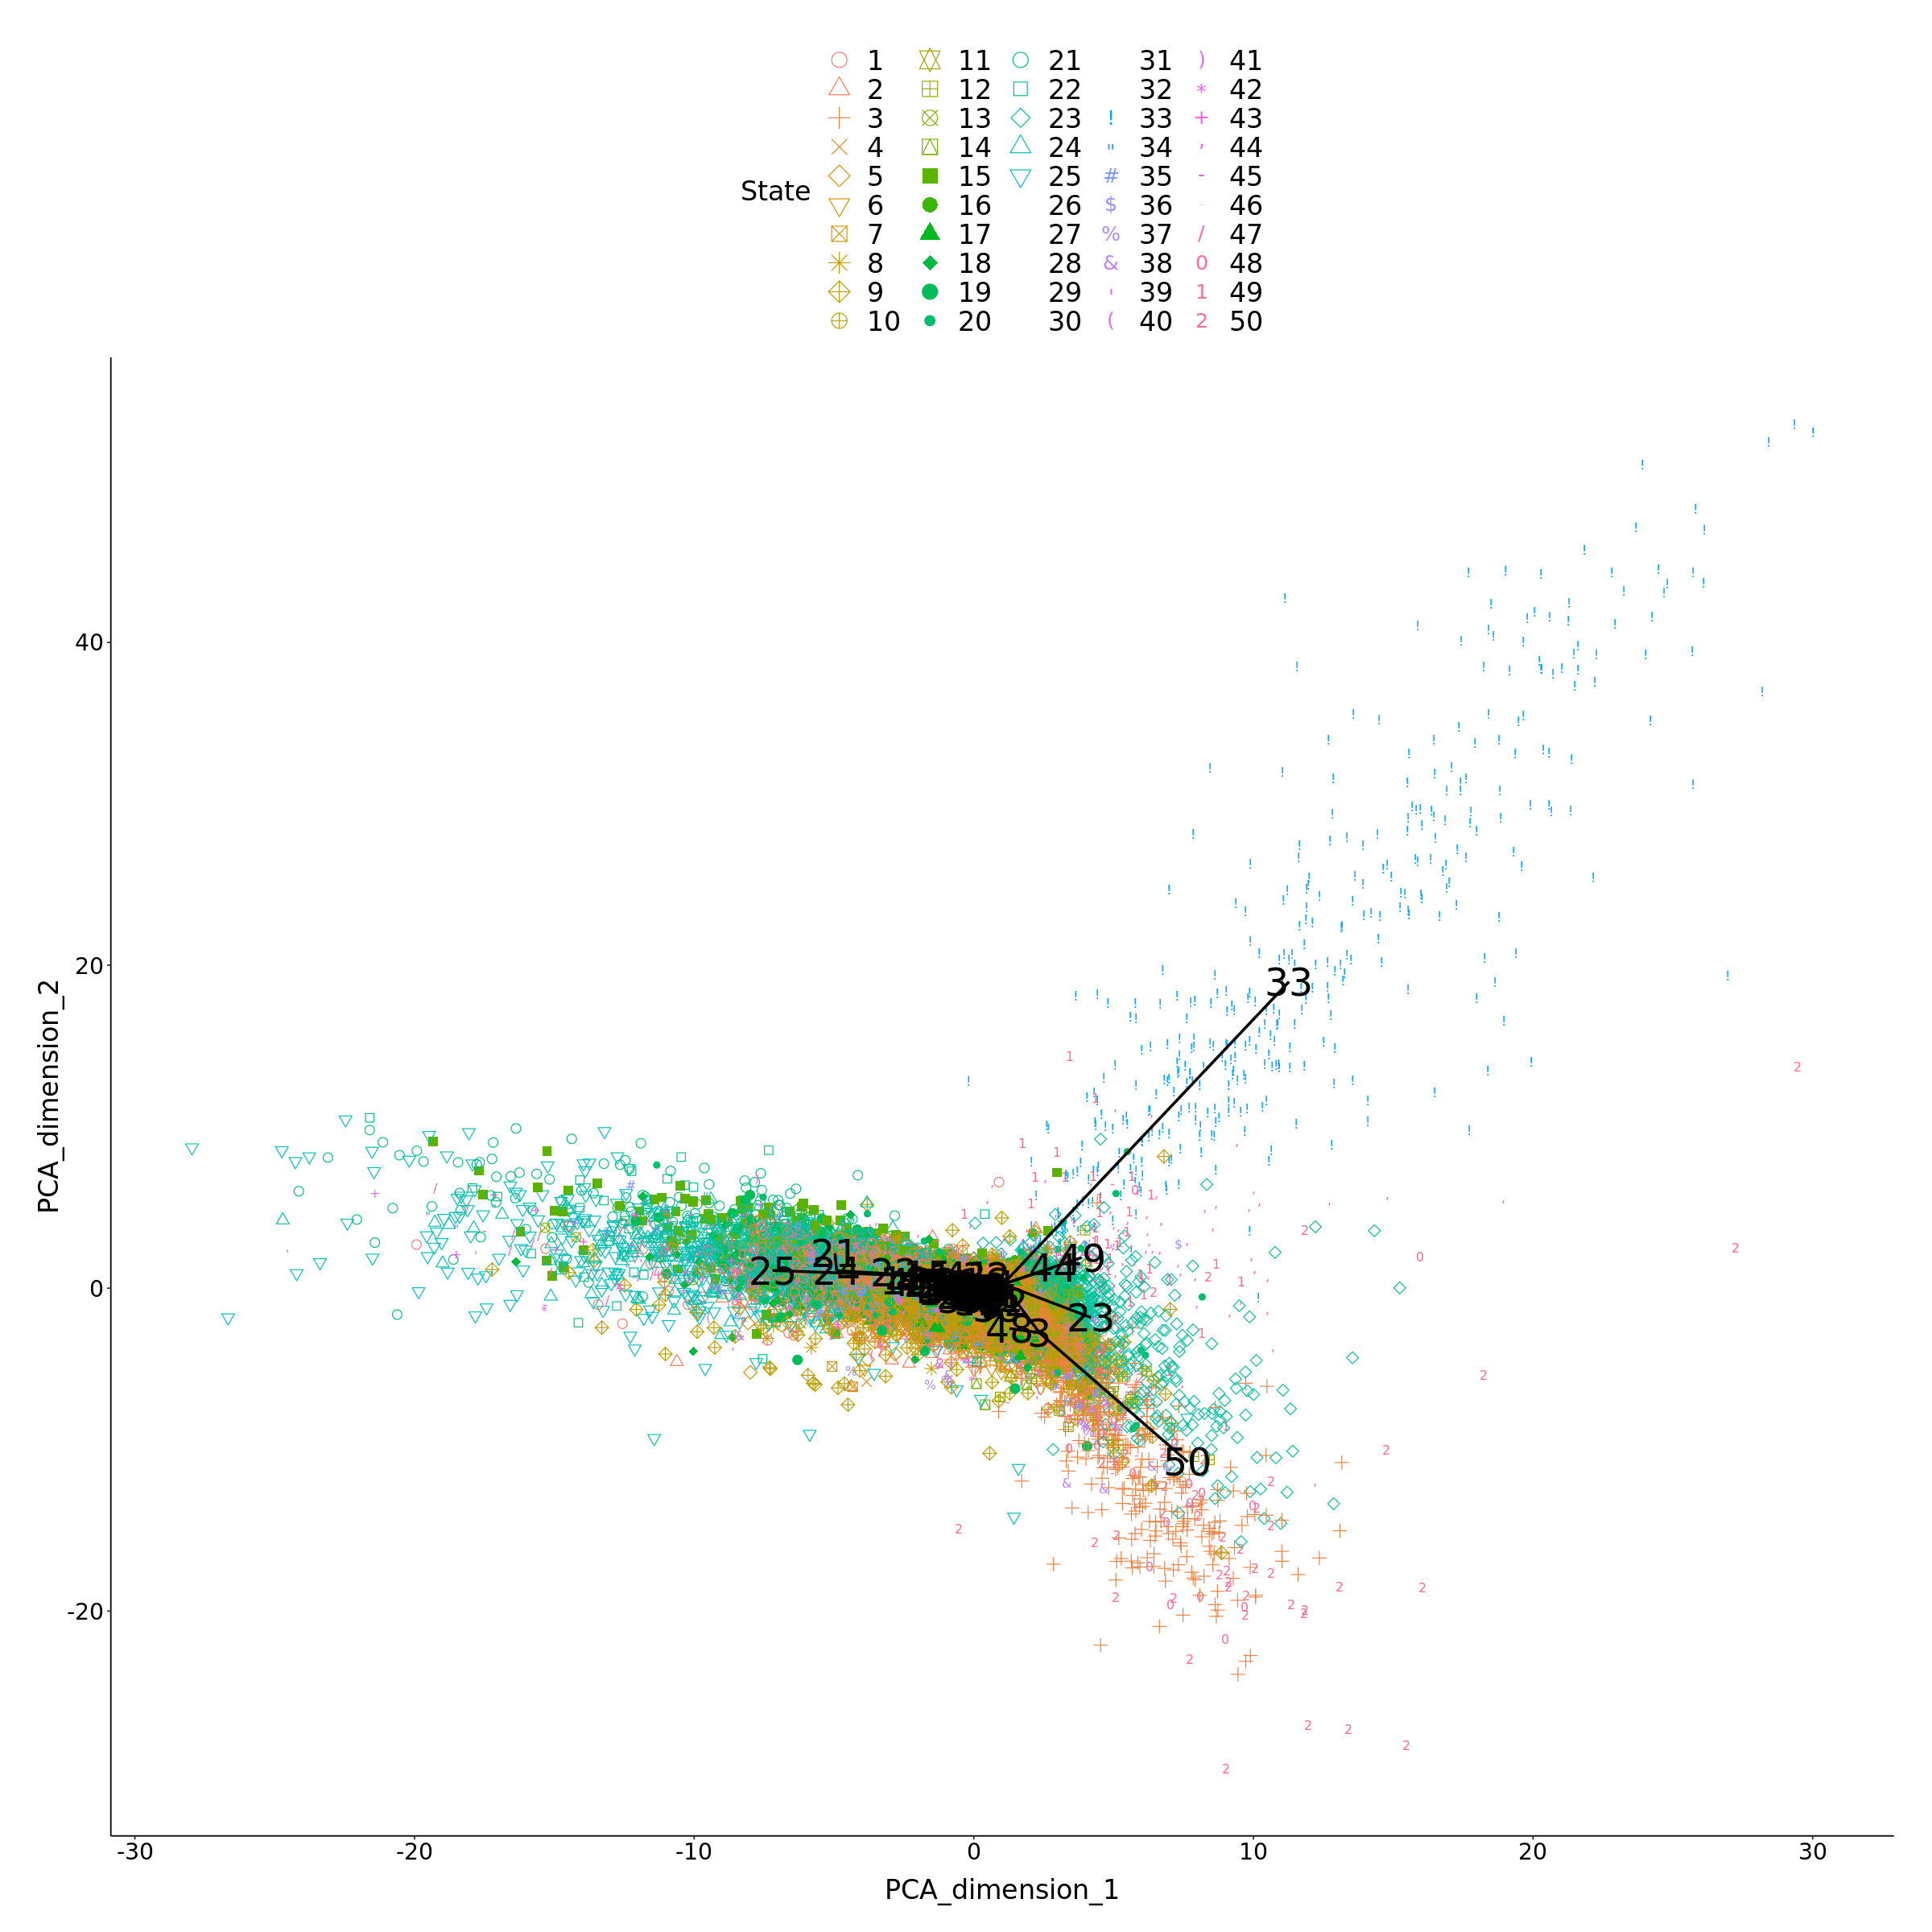

In [186]:
plotmclust(tscan_cluster)+scale_shape_manual(values=c(1:50))

## Testing on Using Imported UMAP Coordinates

In [287]:
UMAP_coordinate = read.csv(file = '/scratch/UMAP_mapped_cell_coordinates.csv')

In [288]:
rownames(UMAP_coordinate) = UMAP_coordinate[,'X']
UMAP_coordinate = UMAP_coordinate[,2:ncol(UMAP_coordinate)]

In [289]:
clusterid = as.numeric(as.factor(UMAP_coordinate['cluster',]))

In [290]:
UMAP_coordinate = UMAP_coordinate[1:2,]

In [291]:
names(clusterid) = colnames(UMAP_coordinate)

In [292]:
# the reduce=F argument is crucial, without it the function performs SVD again
umap_cluster = exprmclust(UMAP_coordinate,cluster=clusterid,reduce=F)

In [293]:
set_plot_dimensions(20,20)

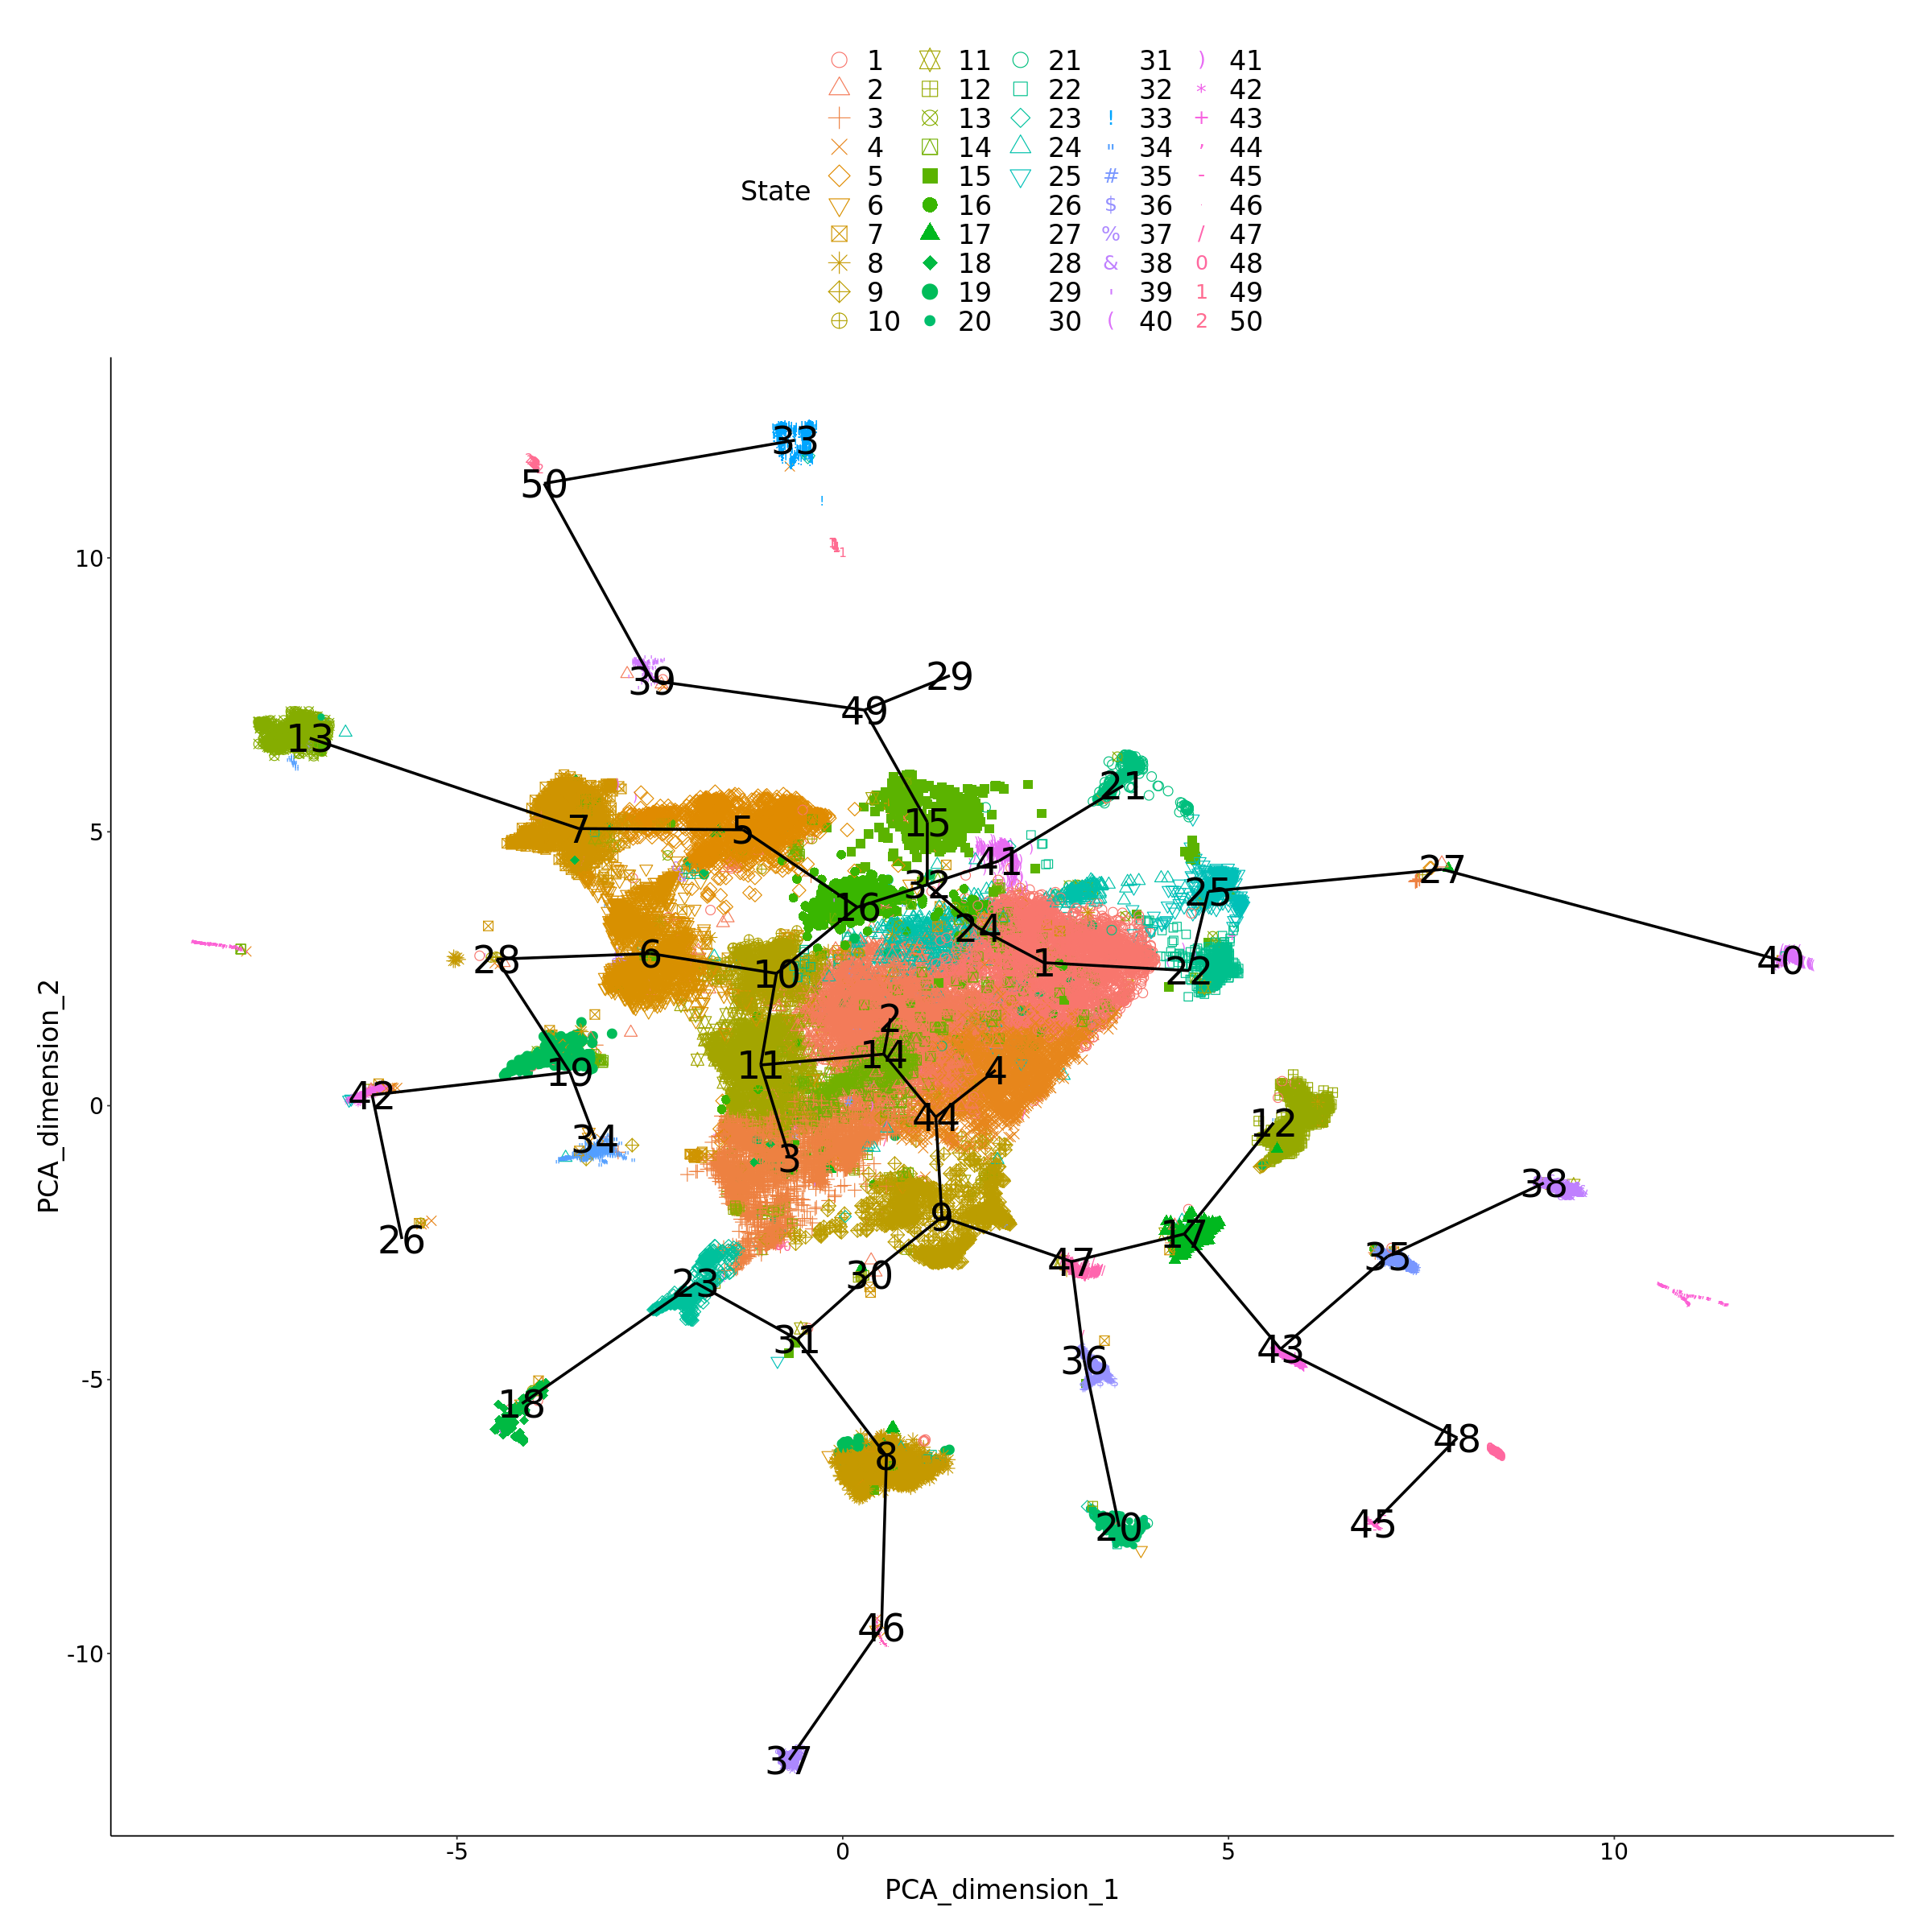

In [294]:
plotmclust(umap_cluster)+scale_shape_manual(values=c(1:50))

In [300]:
cluster_order

,sample_name,State,Pseudotime
,<chr>,<dbl>,<int>
cell12373,cell12373,37,1
cell14233,cell14233,37,2
cell17523,cell17523,37,3
cell4933,cell4933,37,4
cell5795,cell5795,37,5
cell5799,cell5799,37,6
cell8561,cell8561,37,7
cell9734,cell9734,37,8
cell978,cell978,37,9


In [295]:
cluster_order = TSCANorder(umap_cluster)

In [296]:
print(paste0('One end of pseudotime is cluster ',cluster_order[cluster_order['Pseudotime']==1][2]))

[1] "One end of pseudotime is cluster 37"


In [297]:
print(paste0('The other end of pseudotime is cluster ',cluster_order[cluster_order['Pseudotime']==max(cluster_order['Pseudotime'])][2]))

[1] "The other end of pseudotime is cluster 40"


In [298]:
get_path <- function(ann,path){
    mylist <- c()
    for(state in path){
        mylist = c(mylist,ann[state])
    }
    print(mylist)
}

In [299]:
get_path(ann,c(16,5,7,13))

[1] "Non T" "Mem T" "Act T" "Cyt T"
